In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

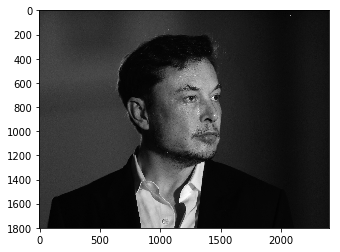

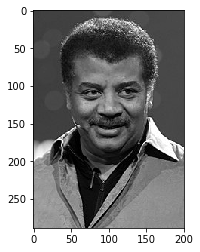

In [3]:
DATADIR = "C:/Users/ashwi/Desktop/ElonvsNDT"
CATEGORIES = ["Elon", "Neil"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break

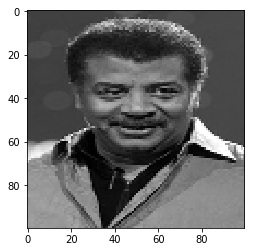

In [4]:
IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [5]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
                # Augment this data and add it to the list
                training_data.append([np.fliplr(new_array),class_num])
            except Exception as e:
                print(e)
create_training_data()

OpenCV(3.4.2) C:\projects\opencv-python\opencv\modules\imgproc\src\resize.cpp:4044: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(3.4.2) C:\projects\opencv-python\opencv\modules\imgproc\src\resize.cpp:4044: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(3.4.2) C:\projects\opencv-python\opencv\modules\imgproc\src\resize.cpp:4044: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(3.4.2) C:\projects\opencv-python\opencv\modules\imgproc\src\resize.cpp:4044: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(3.4.2) C:\projects\opencv-python\opencv\modules\imgproc\src\resize.cpp:4044: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(3.4.2) C:\projects\opencv-python\opencv\modules\imgproc\src\resize.cpp:4044: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(3.4.2) C:\projects\opencv-python\opencv\modules\imgproc\s

In [6]:
print(len(training_data))

1606


In [10]:
import random

random.shuffle(training_data)

In [11]:
X = []
y = []

In [12]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE,1)

In [13]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

C:\Users\ashwi\Anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [17]:
X = pickle.load(open("X.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))

X = X/255.0

model = Sequential()
model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss = "binary_crossentropy",
              optimizer = 'adam',
              metrics=['accuracy'])

model.fit(X,y, batch_size = 10, epochs =5, validation_split = 0.1)

Train on 1445 samples, validate on 161 samples
Epoch 1/5
1445/1445 [==============================] - 14s 10ms/step - loss: 0.6614 - acc: 0.6014 - val_loss: 0.5846 - val_acc: 0.7329
Epoch 2/5
1445/1445 [==============================] - 13s 9ms/step - loss: 0.5565 - acc: 0.7204 - val_loss: 0.5563 - val_acc: 0.6832
Epoch 3/5
1445/1445 [==============================] - 13s 9ms/step - loss: 0.4190 - acc: 0.8242 - val_loss: 0.4668 - val_acc: 0.7702
Epoch 4/5
1445/1445 [==============================] - 14s 9ms/step - loss: 0.3139 - acc: 0.8713 - val_loss: 0.5129 - val_acc: 0.7826
Epoch 5/5
1445/1445 [==============================] - 13s 9ms/step - loss: 0.2156 - acc: 0.9225 - val_loss: 0.5040 - val_acc: 0.8075
